# Genetic Algorithm (GA)

> Genetic algorithms borrow inspiration from biological evolution, where fitter individuals are more likely to pass on their genes to the next generation.

Basic steps of implmenting GA algorithms:
1. Randomly initialize populations p
2. Determine fitness of population
3. Until convergence repeat:
    - Select parents from population
    - Crossover and generate new population
    - Perform mutation on new population
    - Calculate fitness for new population

In [170]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
n_individual = 100 # Number of individual in population
n_gen = 5 #Number of genes in each individual
population = [np.random.randint(0, 2, size = n_gen) for _ in range (n_individual)]
n_epoch  = 100 #the number of epochs or number of iteration.

In [94]:
def selection(population, scores):
    # randomly choose 2 individual
    index1 = np.random.randint(0, len(population) - 1)
    index2 = np.random.randint(0, len(population) - 1)
    
    while index1 == index2:
        index2 = np.random.randint(0, len(population) - 1)
    
    if scores[index2] > scores[index1]:
        return population[index2]
    return population[index1]
    #return the individual with higher score

In [95]:
def crossover(individual1, individual2, r_cross): #r_cross is the rate cross, the probability that 2 individuals perform crossing over.
    c1, c2 = individual1.copy(), individual2.copy() #create 2 children
    prob = np.random.random(size = len(individual1)) #or n_gen
    crossover_index = prob < r_cross
    c1[crossover_index], c2[crossover_index] = c2[crossover_index], c1[crossover_index]
    return c1, c2
    

In [259]:
def mutation(individual, r_mutate, g_range):
    for i in range (len(individual)):
        if np.random.random() < r_mutate:
            while (individual[i] == np.random.randint(g_range[0], g_range[1] + 1)):
                individual[i] = np.random.randint(g_range[0], g_range[1] + 1)
            

In [260]:
def objective(individual):
    return np.sum(individual)

In [261]:
def genetic_algorithm(objective, g_range, n_individual, n_gen, n_epoch, r_cross, r_mutate):
    population = [np.random.randint(g_range[0], g_range[1] + 1, n_gen) for _ in range (n_individual)]

    best_individual, best_eval = 0, objective(population[0])
    loss = []
    for epoch in range (n_epoch):
        scores = [objective(c) for c in population]
        for i in range (n_individual):
            if scores[i] > best_eval:
                best_individual, best_eval = population[i], scores[i]
                print("> Epoch %d: New best f(%s) = %f" % (epoch, population[i], scores[i]))
        loss.append(best_eval)
        selected = [selection(population, scores) for _ in range (n_individual)]
        children = []
        for i in range (0, n_individual, 2):

            p1, p2 = selected[i], selected[i+1]

            for c in crossover(p1, p2, r_cross):
                mutation(c, r_mutate, g_range)
                children.append(c)

        population = children
    return best_individual, best_eval, loss
                

## Apply genetic algorithm for one-max problem

In [262]:
def one_max(individual):
    return np.sum (individual)

> Epoch 2: New best f([0 1 1 0 1 1 1 1]) = 6.000000
> Epoch 4: New best f([1 1 1 0 1 1 1 1]) = 7.000000
> Epoch 8: New best f([1 1 1 1 1 1 1 1]) = 8.000000


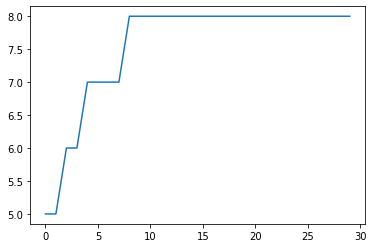

In [263]:
best_individual, best_eval, loss = genetic_algorithm(one_max, (0,1), 10, 8, 30, 0.9, 0.1)
plt.plot(loss)

## Apply genetic algorithm for knap-sack problem

In [264]:
def knap_sack(individual):
    if (sum(individual * weights) > capacity):
        return 0
    else:
        return sum(individual * values)

In [282]:
weights = np.array([1, 2, 5, 7, 10, 12, 15, 23, 32, 33, 35, 37])
values =  np.array([1, 3, 6, 7, 12, 15, 25, 32, 44, 45, 47, 50])
capacity = 70
best_individual, best_eval, loss = genetic_algorithm(knap_sack, (0, 1), n_individual=100, n_gen = 12, n_epoch = 200, r_cross= 0.9, r_mutate=0.1)


> Epoch 0: New best f([1 1 0 1 0 1 1 0 1 0 0 0]) = 95.000000
> Epoch 4: New best f([0 0 0 0 0 0 1 1 1 0 0 0]) = 101.000000


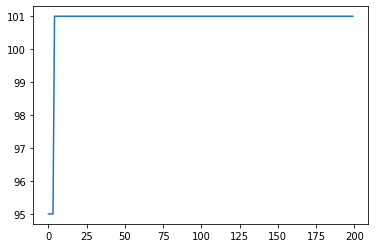

In [283]:
plt.plot(loss)

## Aplly genetic algorithm for TSP problem

In [284]:
def TSP(individual):
    if (len(individual)) != len(set(individual)):
        return -100000
    else:
        obj_val = 0
        for i in range (len(individual)):
            obj_val += cities[individual[i - 1] - 1, individual[i] - 1]
    return -obj_val

In [287]:
## min score = 41
data1 = np.array([[1000,12,1000,5,7],
                [12,1000,14,1000,18],
                [1000,14,1000,6,19],
                [5,1000,6,1000,2],
                [7,18,19,2,1000]])
print(data1.shape)

# min score = 104
data2 = np.array([[9999,3,93,13,33,9],
                [4,9999,77,42,21,16],
                [45,17,9999,36,16,28],
                [39,90,80,9999,56,7],
                [28,46,88,33,9999,25],
                [3,88,18,46,92,9999]])

print(data2.shape)


(5, 5)
(6, 6)


In [304]:
cities = data1
best_individual, best_eval, loss = genetic_algorithm(TSP, (1, 5), 200, 5, 200, 0.9, 0.1)
print(best_individual)

> Epoch 0: New best f([3 4 2 1 5]) = -1044.000000
> Epoch 0: New best f([3 5 4 1 2]) = -52.000000
> Epoch 0: New best f([2 5 1 4 3]) = -50.000000
> Epoch 2: New best f([2 1 5 4 3]) = -41.000000
[2 1 5 4 3]


In [311]:
cities = data2
best_individual, best_eval, loss = genetic_algorithm(TSP, (1, 6), 200, 6, 200, 0.9, 0.1)
print(best_individual)

> Epoch 0: New best f([3 2 5 1 6 4]) = -201.000000
> Epoch 0: New best f([3 5 1 2 4 6]) = -114.000000
> Epoch 8: New best f([5 1 4 6 3 2]) = -104.000000
[5 1 4 6 3 2]


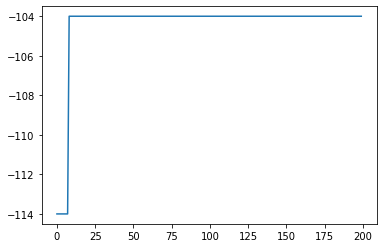

In [312]:
plt.plot(loss)